In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
# dt = 1e-2, Euler integrator
# EllipsePosFirst = np.loadtxt("./ellipse-dt1e-2-pos-first.txt")
# EllipseVelFirst = np.loadtxt("./ellipse-dt1e-2-v-first.txt")
T5Data = np.loadtxt("./T5-Euler.txt")

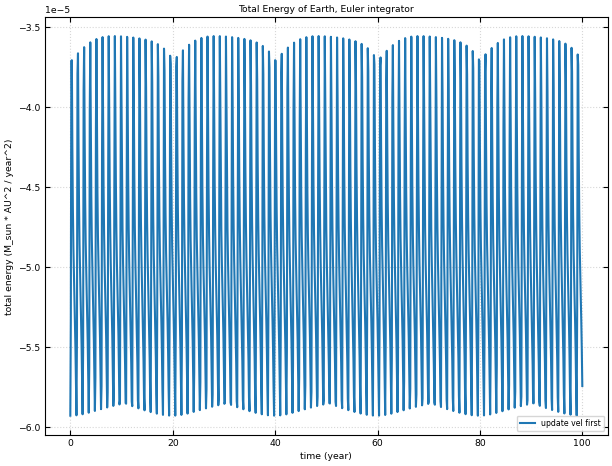

In [3]:
# show energy
# plt.plot(EllipsePosFirst[:, 0], EllipsePosFirst[:, -1], label="update pos first")
# plt.plot(EllipseVelFirst[:, 0], EllipseVelFirst[:, -1], label="update vel first")
plt.plot(T5Data[:, 0], T5Data[:, -1], label="update vel first")
plt.title("Total Energy of Earth, Euler integrator")
plt.xlabel("time (year)")
plt.ylabel("total energy (M_sun * AU^2 / year^2)")
plt.legend()
plt.grid()
plt.savefig("../../T4/Euler-energy.png", dpi=300)
plt.show()


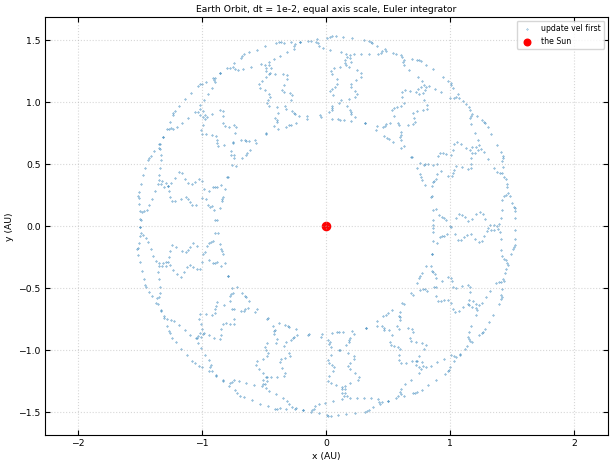

In [4]:
# show orbit
# plt.scatter(EllipsePosFirst[:, 1], EllipsePosFirst[:, 2], s=.2, alpha=1, label="update pos first")
# plt.scatter(EllipseVelFirst[:, 1], EllipseVelFirst[:, 2], s=.1, alpha=1, label="update vel first")
plt.scatter(T5Data[:, 1], T5Data[:, 2], s=.1, alpha=1, label="update vel first")
plt.scatter(0, 0, s=35, c='r', label="the Sun")
plt.ylabel('y (AU)')
plt.xlabel('x (AU)')
plt.title("Earth Orbit, dt = 1e-2, equal axis scale, Euler integrator")
plt.axis('equal')
plt.legend()
plt.grid()
plt.savefig("../../T4/Euler-orbit.png", dpi=300)
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


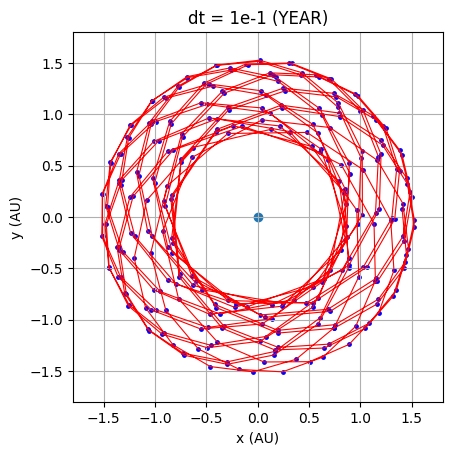

In [47]:
# animation of the evolve of the orbit
# %matplotlib inline
XList = DataDtMinus1[0:-1:1, 1]
YList = DataDtMinus1[0:-1:1, 2]
scale = 1.8

fig, ax = plt.subplots()
ax.set(xlim=[-scale, scale], ylim=[-scale, scale])
ax.set_aspect(1)
ax.grid()
ax.set_title("dt = 1e-1 (YEAR)")
ax.set_xlabel("x (AU)")
ax.set_ylabel("y (AU)")
ax.scatter(0, 0)

scat = ax.scatter(XList[0], YList[0], c="b", s=6, label="Earth")
line2 = ax.plot(XList[0], YList[0], 'r-', linewidth=.8, label="Earth")[0]


def update(frame):
    # for each frame, update the data stored on each artist.
    x = XList[:frame]
    y = YList[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(XList[:frame])
    line2.set_ydata(YList[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=300, interval=6000/300)
ani.save(filename='demo.gif')
plt.show()
